This notebook looks at the vertical eddy viscosity/diffusivity during a deep water renewal event in late August 2003.

Compares isoneutral mixing to default case


In [1]:
%matplotlib inline
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as NC
import numpy as np
import os

from salishsea_tools import (nc_tools,viz_tools)
from salishsea_tools.nowcast import analyze

In [2]:
# Load the data. Path name can be changed to look at different data.  
runs=['dwr_notsmooth_kappa10','dwr_isoneutral']
base='/data/nsoontie/MEOPAR/SalishSea/results/stratification/'
sals={}; depths={}; avms={}; avds={}; Ws={};depthws={}; Us={}; Vs={}
for run in runs:
    path = os.path.join(base,'{}/SalishSea_1d_20030819_20030927_grid_T.nc'.format(run))
    f = NC.Dataset(path,'r');
    sals[run]=f.variables['vosaline']
    depths[run] = f.variables['deptht'] 
    T_lat = f.variables['nav_lat']
    T_lon = f.variables['nav_lon']

    #Loading eddy viscosity/diffusivity data on the vertical grid
    path = os.path.join(base,'{}/SalishSea_1d_20030819_20030927_grid_W.nc'.format(run))
    f = NC.Dataset(path,'r');
    avms[run]=f.variables['ve_eddy_visc']
    avds[run]= f.variables['ve_eddy_diff'] #
    Ws[run]=f.variables['vovecrtz']
    depthws[run] = f.variables['depthw']

    #Loading data on the ugrid
    path = os.path.join(base,'{}/SalishSea_1d_20030819_20030927_grid_U.nc'.format(run))
    f = NC.Dataset(path,'r');
    Us[run]=f.variables['vozocrtx']


    #Loading data on the ugrid
    path = os.path.join(base,'{}/SalishSea_1d_20030819_20030927_grid_V.nc'.format(run))
    f = NC.Dataset(path,'r');
    Vs[run]=f.variables['vomecrty']


grid = NC.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
bathy=grid.variables['Bathymetry']


# Basic Comparison

Which case has higher eddy viscosity? Higher average? How does it change over time? Where are the max values?


In [3]:

maxes_diff={}; maxes_visc={}; means_diff={}; means_visc={}; inds_diff={}; inds_visc={}

for run in runs:
    maxes_diff[run]=[]; maxes_visc[run]=[]; means_diff[run]=[]; means_visc[run]=[]; inds_diff[run]=[]
    inds_visc[run]=[]
    for t in np.arange(0,sals[run].shape[0]):
        #mask
        mu = avds[run][t,0:,:,:] == 0
        avd_mask = np.ma.array(avds[run][t,::,:,:],mask=mu)
        mu = avms[run][t,0:,:,:] == 0
        avm_mask = np.ma.array(avms[run][t,::,:,:],mask=mu)
        maxes_diff[run].append(np.nanmax(avd_mask))
        ind =np.nanargmax(avd_mask)
        inds_diff[run].append(np.unravel_index(ind, avd_mask.shape))
        maxes_visc[run].append(np.nanmax(avm_mask))
        ind =np.nanargmax(avm_mask)
        inds_visc[run].append(np.unravel_index(ind, avm_mask.shape))
        means_diff[run].append(np.nanmean(avd_mask))
        means_visc[run].append(np.nanmean(avm_mask))

In [4]:
for run in runs:
    print run
    print inds_diff[run]
    print inds_visc[run]



dwr_notsmooth_kappa10
[(1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119)]
[(1, 801, 130), (1, 801, 130), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 778, 122), (1, 778, 122), (1, 778, 122), (1, 801, 130), (1, 801, 130), (1, 778, 122), (1, 778, 121), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 778, 122), (1, 778, 122), (1, 778, 122), (

Where are the highest vertical eddy coeffcients? Notsmooth changes over time but it looks like it is always in the northern part of the domain

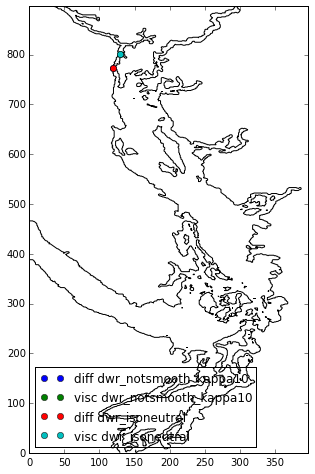

In [5]:
fig,ax=plt.subplots(1,1,figsize=(5,8))
viz_tools.plot_coastline(ax,grid)
for run in runs:
    ax.plot(inds_diff[run][0][2],inds_diff[run][0][1],'o',label='diff ' + run)
    ax.plot(inds_visc[run][0][2],inds_visc[run][0][1],'o',label='visc ' + run)
plt.legend(loc=0)

/home/nsoontie/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


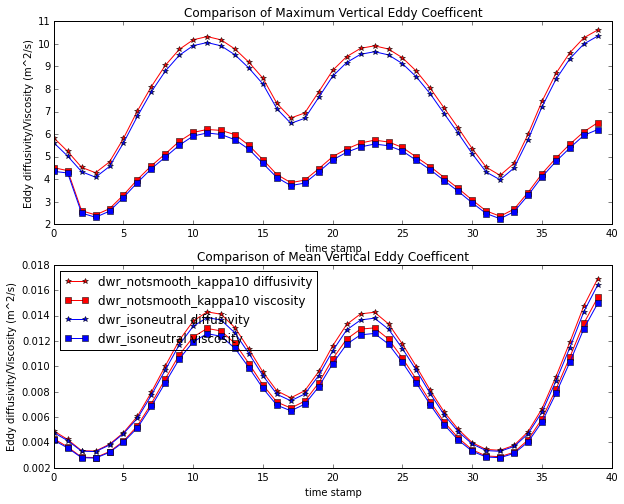

In [6]:
fig,axs=plt.subplots(2,1,figsize=(10,8))
ts=np.arange(0,sals['dwr_notsmooth_kappa10'].shape[0])
#maxes
ax=axs[0]
run1=runs[0]
ax.plot(ts,maxes_diff[run1],'*-r',label=run1 +' diffusivity')
ax.plot(ts,maxes_visc[run1],'s-r',label=run1 +' viscosity')
run2=runs[1]
ax.plot(ts,maxes_diff[run2],'*-b',label=run2 +' diffusivity')
ax.plot(ts,maxes_visc[run2],'s-b',label=run2 +' viscosity')
ax.set_xlabel('time stamp')
ax.set_ylabel('Eddy diffusivity/Viscosity (m^2/s)')
ax.set_title('Comparison of Maximum Vertical Eddy Coefficent')
plt.legend(loc=0)

#means
ax=axs[1]

ax.plot(ts,means_diff[run1],'*-r',label=run1 +' diffusivity')
ax.plot(ts,means_visc[run1],'s-r',label=run1+' viscosity')

ax.plot(ts,means_diff[run2],'*-b',label=run2 +' diffusivity')
ax.plot(ts,means_visc[run2],'s-b',label=run2 +' viscosity')
    
ax.set_xlabel('time stamp')
ax.set_ylabel('Eddy diffusivity/Viscosity (m^2/s)')
ax.set_title('Comparison of Mean Vertical Eddy Coefficent')
plt.legend(loc=0)

* Note that the average does not take into account changes in gridbox size. All boxes are treated equally. Masking is applied though
* Slightly smaller vertical mixing coefficients in the iso_neutral case.

# Thalweg

Plotting salinity and eddy viscosity/diffusivity along thalweg over time. Daily average outputs over 10 days.

In [7]:
lines = np.loadtxt('/data/nsoontie/MEOPAR/tools/bathymetry/thalweg_working.txt', delimiter=" ", unpack=False)
lines = lines.astype(int)

thalweg_lon = T_lon[lines[:,0],lines[:,1]]
thalweg_lat = T_lat[lines[:,0],lines[:,1]]

ds=np.arange(0,lines.shape[0],1);
vs=np.arange(34,27.5,-0.5);
XX_T={}; ZZ_T={}; XX_W={}; ZZ_W={} 
for run in runs:
    XX_T[run],ZZ_T[run] = np.meshgrid(ds,-depths[run][:])
    XX_W[run],ZZ_W[run] = np.meshgrid(ds,-depthws[run][:])

Salinity difference along thalweg over time.

dwr_notsmooth_kappa10 - dwr_isoneutral


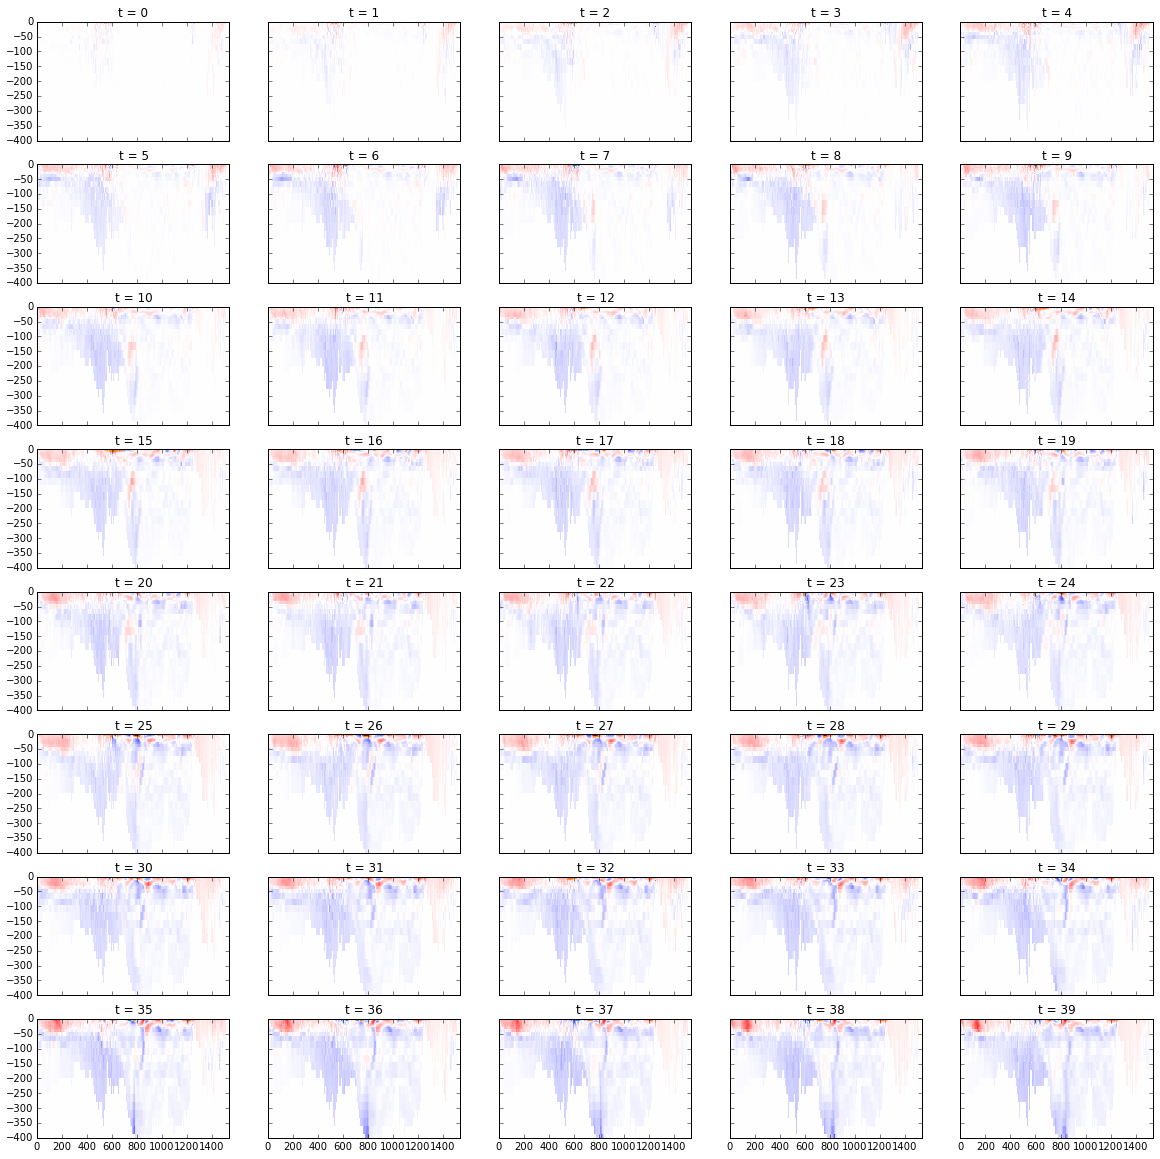

In [8]:
fig,axs=plt.subplots(8,5,figsize=(20,20),sharex=True,sharey=True)
smin=-.2;smax=.2
diff = sals[run1][:]-sals[run2][:]
for t,ax in zip(np.arange(40),axs.flat):
    mesh=ax.pcolormesh(XX_T[run],ZZ_T[run],(diff[t,:,lines[:,0],lines[:,1]]).T,vmin=smin,vmax=smax,cmap='bwr')
    CS=ax.contour(XX_T[run],ZZ_T[run],(diff[t,:,lines[:,0],lines[:,1]]).T,[-.4,-.2,0.2,.4])
    ax.clabel(CS,fontsize=9, inline=1)
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_ylim([-400,0])
    ax.set_title('t = ' +str(t))
    
print run1 + ' - ' + run2

* Differences are small. Saturated at +- 0.2 psu
* General trend is that iso_neutral is slightly fresher in surface SJdF, saltier in deep SJdF. 
* Looks like deep water renewal is slightly saltier in iso_neutral. Again, this is small <0.2.
* Simulation is 40 days long

# Surface

dwr_notsmooth_kappa10 - dwr_isoneutral


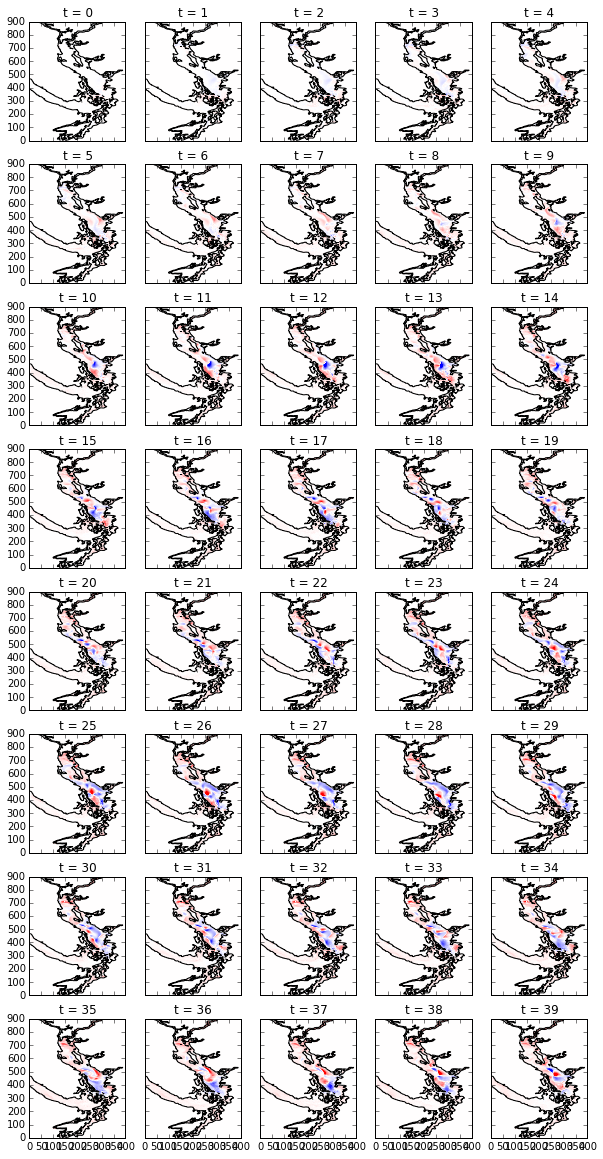

In [9]:
fig,axs=plt.subplots(8,5,figsize=(10,20),sharex=True,sharey=True)
smin=-1;smax=1; dep=0

for t,ax in zip(np.arange(40),axs.flat):
    salP=sals[run1][t,dep,:,:];
    salP1=salP
    salP=sals[run2][t,dep,:,:];
    mesh=ax.pcolormesh(salP1-salP,vmin=smin,vmax=smax,cmap='bwr')
    viz_tools.plot_coastline(ax,grid)
    
    ax.set_title('t = ' +str(t))
    
print run1 + ' - ' + run2

* No clear trend except surface JdF and northern SoG is slightly fresher in iso_neutral.
* Surface plume salinity is certainly affected, but I don't see a clear pattern.
* Colorbar saturated at +- 1

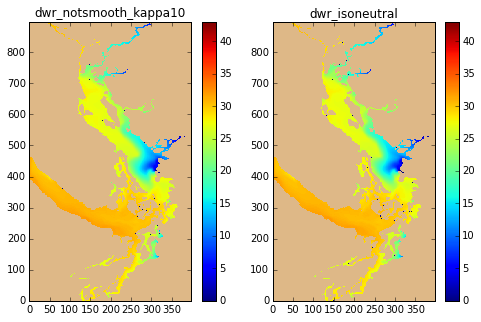

In [10]:
fig,axs=plt.subplots(1,2,figsize=(8,5))
smin=0;smax=43; dep=0; t=39
mesh=axs[0].pcolormesh(sals[run1][t,dep,:,:],vmin=smin,vmax=smax,cmap='jet')
cbar=plt.colorbar(mesh,ax=axs[0])
viz_tools.plot_land_mask(axs[0],grid,color='burlywood')
axs[0].set_title(run1)
mesh=axs[1].pcolormesh(sals[run2][t,dep,:,:],vmin=smin,vmax=smax,cmap='jet')
cbar=plt.colorbar(mesh,ax=axs[1])
viz_tools.plot_land_mask(axs[1],grid,color='burlywood')
axs[1].set_title(run2)


Surface salinity field on last day (40th). No visible differences. Field is a daily average

In [11]:
def average_thalweg(depth, index1,index2, var):
    #Averages the given variable along the thalweg at a depth and for indices between index1 and index2
    
    var_thal = var[depth,lines[:,0],lines[:,1]]
    #mask
    mu = var_thal==0
    var_thal=np.ma.array(var_thal,mask=mu)
    
    var_average=np.nanmean(var_thal[index1:index2])
    
    return var_average

dwr_notsmooth_kappa10 - dwr_isoneutral


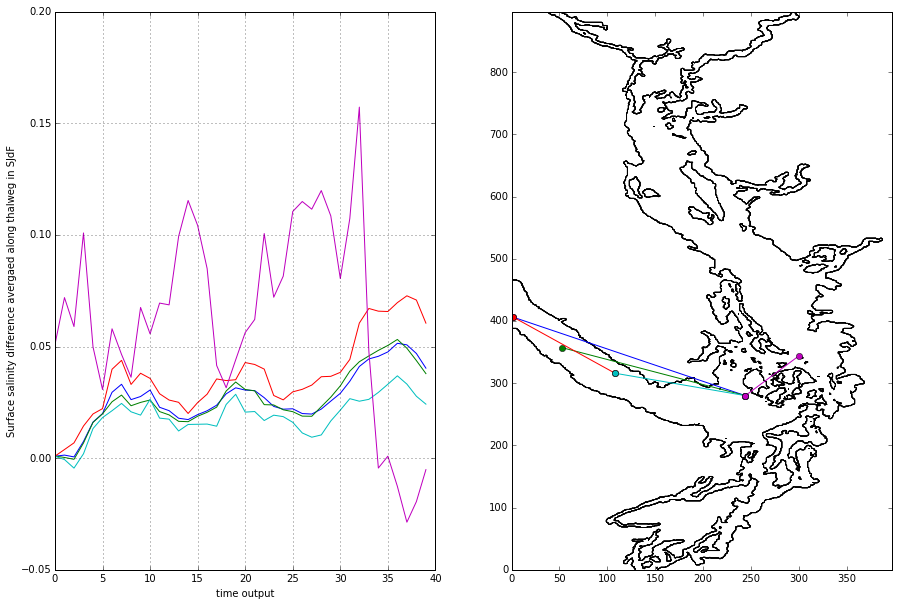

In [12]:
#plot now
t1=0;t2=40;
fig,axs = plt.subplots(1,2,figsize=(15,10))
diffs = sals[run1][t1:t2,:,:,:]-sals[run2][t1:t2,:,:,:]
tm=np.arange(t1,t2)
inds1 = [0,100,0,200,450]; inds2= [450,450,200,450,600]
dep=0; 
for ind1,ind2 in zip(inds1,inds2):
    averages = []
    for n in range(diffs.shape[0]):
        averages.append(average_thalweg(dep,ind1,ind2,diffs[n,:,:,:]))
    ax=axs[0]
    ax.plot(tm,averages)
    ax.set_xlabel('time output')
    ax.set_ylabel('Surface salinity difference avergaed along thalweg in SJdF')

    ax=axs[1]
    viz_tools.plot_coastline(ax,grid)
    ax.plot([lines[ind1,1],lines[ind2,1]],[lines[ind1,0],lines[ind2,0]],'o-')
axs[0].grid()
    
print run1 + ' - ' + run2

* SJdF surface waters fresher in isoneutral. The freshening trend appears to be increasing over time and could possibly continue beyond this simulation.
* Spring/neap variability in differnces is visbile
* For a large chunk of the simularion, surface Gulf Islands water is fresher in isoneutral, but not in the last few days. 
* Right at the surface, k=0

Left: dwr_notsmooth_kappa10
Right: dwr_isoneutral


/home/nsoontie/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/nsoontie/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


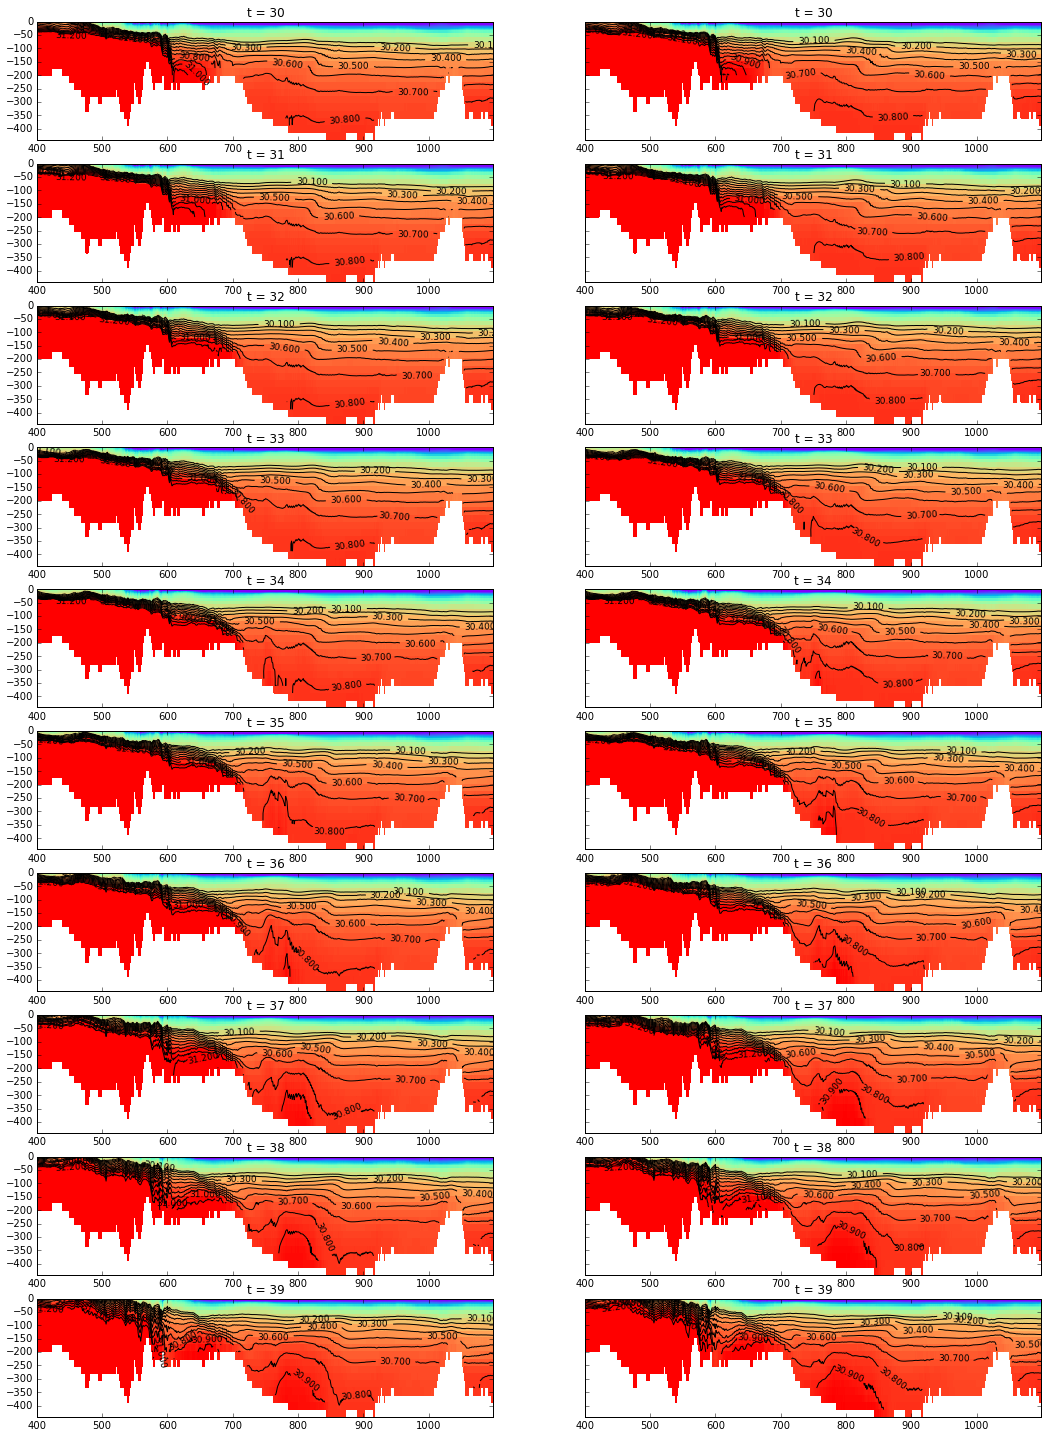

In [13]:
smin=28; smax=31
emin=-4; emax=2

(fig,axs)=plt.subplots(10,2,figsize=(18,25),sharey=True)
ts=np.arange(30,40,1)
vs=np.arange(31.2,30,-0.1);

r1=400; r2=1100;

for t,ax1,ax2 in zip(ts,axs[:,0],axs[:,1]):
    #salinity
    run=runs[0]
    salP=sals[run][t,:,lines[r1:r2,0],lines[r1:r2,1]];
    mu =salP == 0; salP= np.ma.array(salP,mask=mu)
    mesh=ax1.pcolormesh(XX_T[run][:,r1:r2],ZZ_T[run][:,r1:r2],salP,vmin=smin,vmax=smax,cmap='rainbow')
    CS=ax1.contour(XX_T[run][:,r1:r2],ZZ_T[run][:,r1:r2],salP,vs, colors='black')
    ax1.clabel(CS,fontsize=9, inline=1)
    ax1.set_title('t = ' +str(t))
    
    run=runs[1]
    salP=sals[run][t,:,lines[r1:r2,0],lines[r1:r2,1]];
    mu =salP == 0; salP= np.ma.array(salP,mask=mu)
    mesh=ax2.pcolormesh(XX_T[run][:,r1:r2],ZZ_T[run][:,r1:r2],salP,vmin=smin,vmax=smax,cmap='rainbow')
    CS=ax2.contour(XX_T[run][:,r1:r2],ZZ_T[run][:,r1:r2],salP,vs, colors='black')
    ax2.clabel(CS,fontsize=9, inline=1)
    ax2.set_title('t = ' +str(t))
print 'Left:', runs[0]
print 'Right:', runs[1]

It looks as though more salty water is entering the basin during deep water renewal in the iso neutral case. 

# Average salinity over a volume

In this case, averaging will take into account that the grid spacing changes vertically. But I am assuming that horizontal grid boxes are equal area.

In [14]:
def average_over_box(varis,depths,t,imin,imax,jmin,jmax,dmin,dmax):
    """Average field stored in var over a box at a time t. """
    
    var_av={}
    #iteraring over variables in varis
    for key, var in varis.iteritems():
        #subdomain
        sub = var[t,dmin:dmax+1,jmin:jmax+1,imin:imax+1]
        sub_dep = depths[key][dmin:dmax+1]
        #mask
        sub=np.ma.masked_values(sub,0)
        #averaing horizontally. Assuming horizontal grid boxes are equal area
        sub = np.nanmean(sub,axis=2)
        sub = np.nanmean(sub,axis=1)
        var_av[key]=analyze.depth_average(sub,sub_dep,depth_axis=0)
    return var_av

In [15]:
def compare_volume_average(imin,imax,jmin,jmax,dmin,dmax):
    """"time series of volume averages comparison"""
    #time series of average
    keys=sals.keys()
    sals_av = {keys[0]:[],keys[1]:[]}
    for t in np.arange(sals[keys[1]].shape[0]):
        avg=average_over_box(sals,depths,t,imin,imax,jmin,jmax,dmin,dmax)
        for run, out in avg.iteritems():
            sals_av[run].append(out)
    
    #plotting
    fig,axs=plt.subplots(1,2,figsize=(10,5))
    #map
    ax=axs[0]
    viz_tools.plot_coastline(ax,grid)
    ax.plot([imin,imax],[jmin,jmin],'r-')
    ax.plot([imin,imax],[jmax,jmax],'r-')
    ax.plot([imin,imin],[jmin,jmax],'r-')
    ax.plot([imax,imax],[jmin,jmax],'r-')
    
    #averages
    ax=axs[1]
    for key, sal_plot in sals_av.iteritems():
        ax.plot(sal_plot,label=key)
        ax.legend(loc=0)
        ax.set_xlabel('output time')
        ax.set_ylabel('Average Salinity [psu]')
    ax.set_title('Depth range {0:.3} -{1:.3} m'.format(depths[key][dmin], depths[key][dmax]))
    ax.grid()
    ax.get_yaxis().get_major_formatter().set_useOffset(False)
    
    diff = np.array(sals_av[keys[1]])-np.array(sals_av[keys[0]])
    print 'Difference between {} and {} in [psu]'.format(keys[1], keys[0])
    print 'Max diff: {0:.2}'.format(np.max(diff))
    print 'Min diff: {0:.2}'.format(np.min(diff))
    print 'Mean diff: {0:.2}'.format(np.mean(diff))
    return fig


## Juan de Fuca - surface, depth, whole water column

Difference between dwr_notsmooth_kappa10 and dwr_isoneutral in [psu]
Max diff: 0.025
Min diff: 0.00096
Mean diff: 0.017


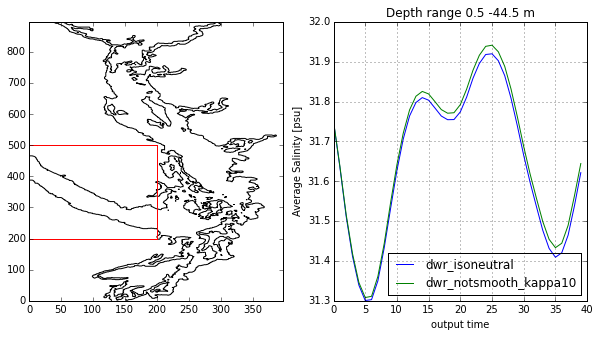

In [16]:
fig = compare_volume_average(0,200,200,500,0,23)

Difference between dwr_notsmooth_kappa10 and dwr_isoneutral in [psu]
Max diff: -0.00034
Min diff: -0.0061
Mean diff: -0.0042


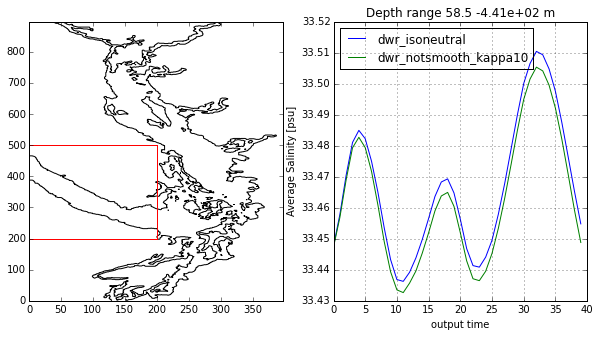

In [17]:
fig = compare_volume_average(0,200,200,500,24,39)

Difference between dwr_notsmooth_kappa10 and dwr_isoneutral in [psu]
Max diff: 3.5e-06
Min diff: -0.0026
Mean diff: -0.001


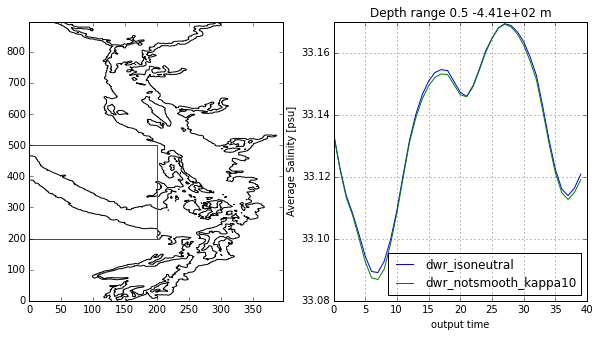

In [18]:
fig = compare_volume_average(0,200,200,500,0,39)

* Differences in surface of JdF are more significant than at depth (but the "at depth" is averaged over a larger range..)
* Differences are small, but they seem to be increasing over time

## Gulg Islands - surface, depth, whole water column

Difference between dwr_notsmooth_kappa10 and dwr_isoneutral in [psu]
Max diff: 0.013
Min diff: -0.0016
Mean diff: 0.0076


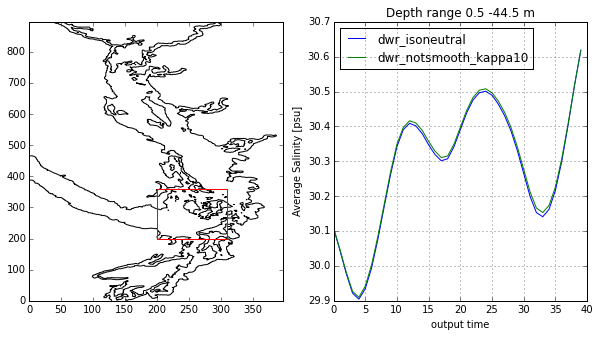

In [19]:
fig = compare_volume_average(200,310,200,360,0,23)

Difference between dwr_notsmooth_kappa10 and dwr_isoneutral in [psu]
Max diff: -0.00064
Min diff: -0.036
Mean diff: -0.025


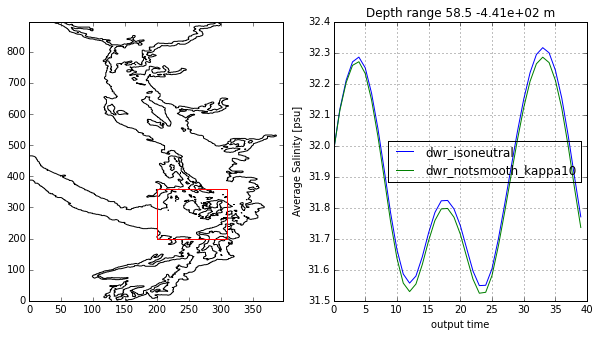

In [20]:
fig = compare_volume_average(200,310,200,360,24,39)

Difference between dwr_notsmooth_kappa10 and dwr_isoneutral in [psu]
Max diff: -0.0005
Min diff: -0.031
Mean diff: -0.02


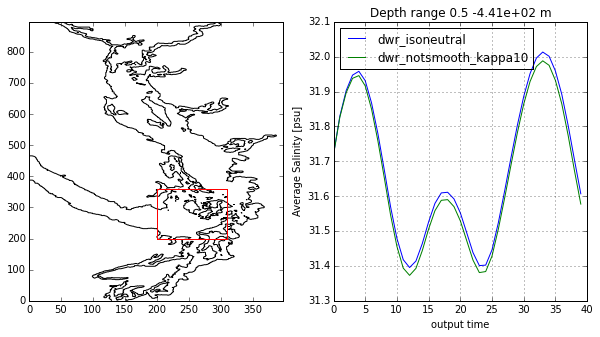

In [21]:
fig = compare_volume_average(200,310,200,360,0,39)

* Isoneutral is slightly saltier in Gulf Islands. Again this is small, but maybe a longer simulation would give a better idea of the trend. 


## Strait of Georgia - surface, depth, whole water column

Difference between dwr_notsmooth_kappa10 and dwr_isoneutral in [psu]
Max diff: 0.015
Min diff: -0.0074
Mean diff: 0.0026


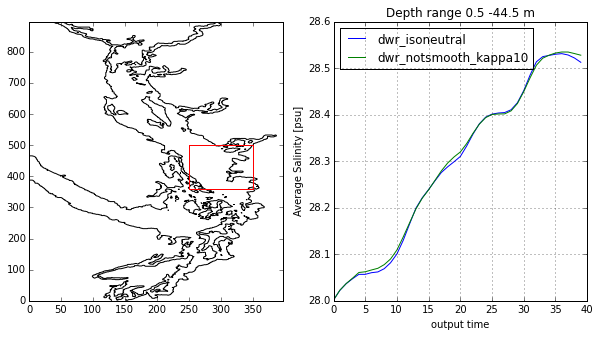

In [22]:
fig = compare_volume_average(250,350,360,500,0,23)

Difference between dwr_notsmooth_kappa10 and dwr_isoneutral in [psu]
Max diff: -2.4e-05
Min diff: -0.025
Mean diff: -0.011


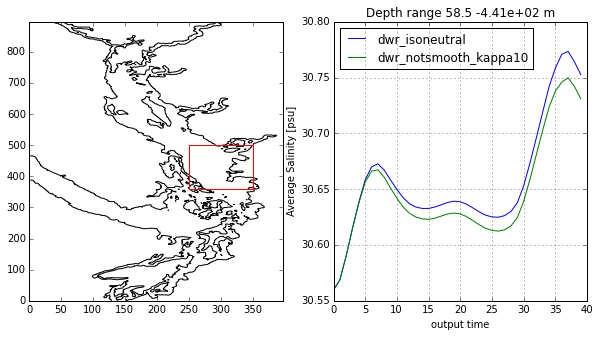

In [23]:
fig = compare_volume_average(250,350,360,500,24,39)

Difference between dwr_notsmooth_kappa10 and dwr_isoneutral in [psu]
Max diff: 1e-05
Min diff: -0.021
Mean diff: -0.0091


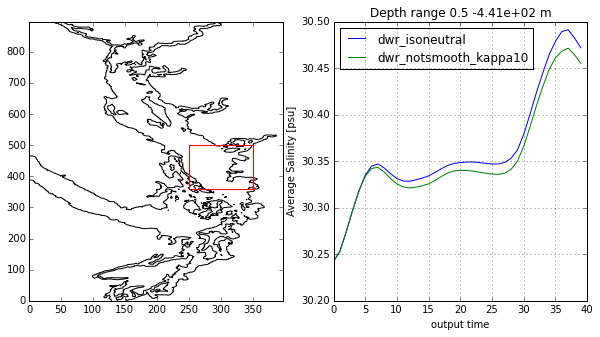

In [24]:
fig = compare_volume_average(250,350,360,500,0,39)

#Summary

* Differences are small, but the trend I am seeing is less mixing because
   * Eddy coefficients are slightly smaller
   * JdF surface is slightly fresher
   * Gulf deep is slightly saltier
   * SoG depp is slighly saliter
* It's a slow process, but I don't see any major downsides in switching to this type of mixing. My guess is in the long term trend we'll have a saltier SoG basin. But I'm realizing these are small changes and might take awhile to accumulate to anything substantial.    
 

#Next

* Investigate the combination of isoneutral and decreased background diff/visc